In [1]:
#for local
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2
import math, random, copy, numpy as np
import cProfile
import yaml
from utils import get_class_from_class_path, HELMConverter
from node import MolSentenceNode #change after Filter implementation
from generator import MCTS

c:\Users\fsfsf\anaconda3\envs\molgen-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config_path = "config/mcts_helm.yaml"
with open(repo_root + config_path) as f:
    conf = yaml.safe_load(f)
    
model_class_path, model_dir, lang_class_path, lang_path = (conf.get(k) for k in ("model_class_path", "model_dir", "lang_class_path", "lang_path"))
lang_class = get_class_from_class_path(lang_class_path)
lang = lang_class.load(repo_root + lang_path)
if lang_class_path.endswith("HELM"): #should be removed after .lang inclusion
    lang.converter = HELMConverter().load(repo_root + "data/helm/library/chembl_35_monomer_library.xml")
model_class = get_class_from_class_path(model_class_path)
model = model_class(lang=lang, model_dir=repo_root + model_dir)

reward_class_path, reward_conf = (conf.get(k) for k in ("reward_class_path", "reward_conf"))
reward_class = get_class_from_class_path(reward_class_path)
reward = reward_class(**reward_conf)

policy_class_path, policy_conf = (conf.get(k) for k in ("policy_class_path", "policy_conf"))
policy_class = get_class_from_class_path(policy_class_path)
policy = policy_class(**policy_conf)

Search is started.
0- time: 0.19, count_rollouts: 1, reward: -0.2717959421369426, mol: PEPTIDE1{R.R.I.I.R.W.L.A.R}$$$$
1- time: 0.31, count_rollouts: 2, reward: 0.38379870777781666, mol: PEPTIDE1{K.G.W.R.W.W.W.W.W.[am]}$$$$
2- time: 0.38, count_rollouts: 3, reward: -0.47535264909487424, mol: PEPTIDE1{[ac].F.Q.S.K.K.N.V.F.V.F.G.Y.F.E.R.L.A.A.K.L.[am]}$$$$
3- time: 0.76, count_rollouts: 5, reward: 0.06731504742681556, mol: PEPTIDE1{Y.F.A.L.K.V.I.L.R}$$$$
4- time: 0.83, count_rollouts: 6, reward: -0.1893182681039574, mol: PEPTIDE1{G.Y.A.G}$$$$
5- time: 0.87, count_rollouts: 7, reward: -0.8015415078617499, mol: PEPTIDE1{F.F.G.G.F.T.G.R.K.S.A.R.K.R.K.S.G}$$$$
6- time: 0.95, count_rollouts: 8, reward: -0.6987532033622014, mol: PEPTIDE1{A.S.T.I.P.N.F.P.F.D.I.T.N.Y.T.Q.M.A.V.K}$$$$
7- time: 1.05, count_rollouts: 9, reward: -0.7528991932219898, mol: PEPTIDE1{T.P.R.E.R.R.R.K.K.R.G}$$$$
8- time: 1.10, count_rollouts: 10, reward: -0.2843882304016544, mol: PEPTIDE1{K.Y.I.G.H.G.A.T.L}$$$$
9- time: 1

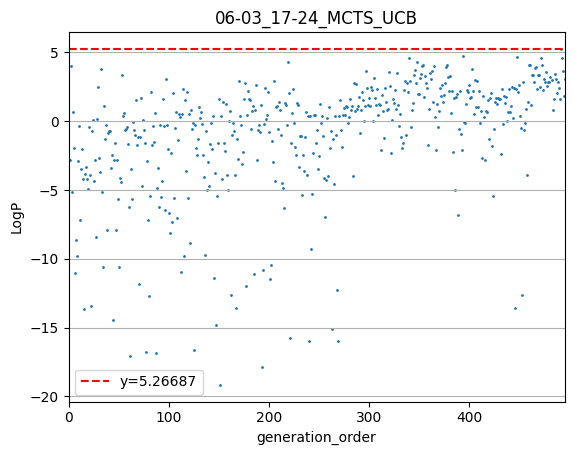

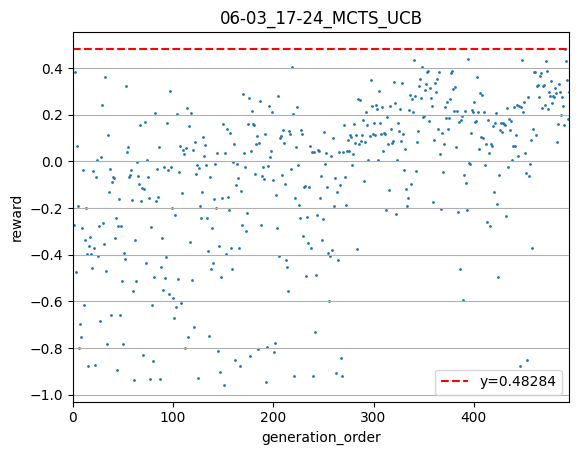

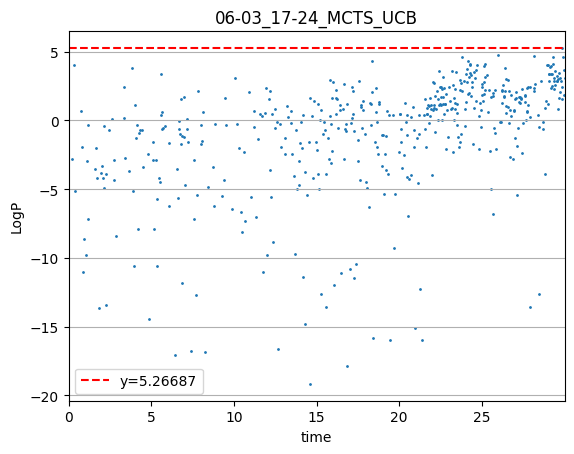

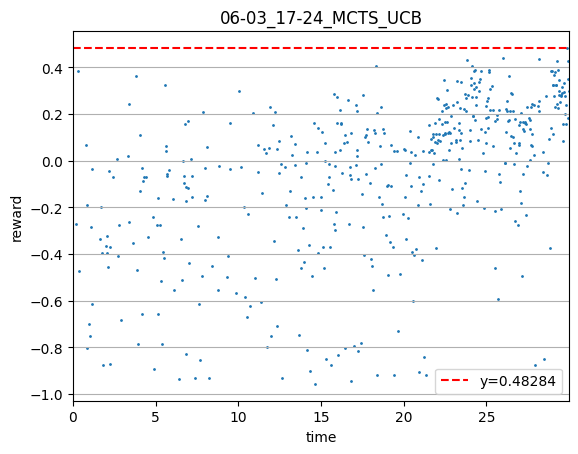

Search is completed.


In [4]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') #invalid mols are already logged

root = MolSentenceNode.bos_node(lang)

output_dir, generation_conf = (conf.get(k) for k in ("output_dir", "generation_conf"))
generator = MCTS(transition=model, reward=reward, policy=policy, output_dir=output_dir)
generator.generate(root=root, **generation_conf)
#cProfile.run("generator.generate(root=root, **generation_conf)"")

In [7]:
#save mcts
save_path = generator.output_dir() + "test.mcts"
generator.save(save_path)

In [ ]:
#load mcts
generator = MCTS.load(save_path, model)